In [15]:
import pandas as pd
import seaborn as sns
a=pd.read_csv("C:\\Users\\kadam\\OneDrive\\Desktop\\rooman\\data sets\\Titanic-Dataset.csv")
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
b=a.ffill()
df=b.fillna('B42',limit=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import OrdinalEncoder
col=df.pop("Survived")
df['family']=df['SibSp']+df['Parch']
df.loc[df['family']>0,'traveled alone']=0
df.loc[df['family']==0,'traveled alone']=1

df["Survived"]=col
df.pop("Name")
df.pop("Ticket")
df['Sex']=OrdinalEncoder().fit_transform(df[['Sex']])
df.pop("Embarked")
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df['Cabin']=OrdinalEncoder().fit_transform(df[['Cabin']])

df




,PassengerId,Pclass,Sex,Age,Fare,Cabin,family,traveled alone,Survived
0,1,3,1.0,22.0,7.2500,30.0,1,0.0,0
1,2,1,0.0,38.0,71.2833,81.0,1,0.0,1
2,3,3,0.0,26.0,7.9250,81.0,0,1.0,1
3,4,1,0.0,35.0,53.1000,55.0,1,0.0,1
4,5,3,1.0,35.0,8.0500,55.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1.0,27.0,13.0000,70.0,0,1.0,0
887,888,1,0.0,19.0,30.0000,30.0,0,1.0,1
888,889,3,0.0,19.0,23.4500,30.0,3,0.0,0
889,890,1,1.0,26.0,30.0000,60.0,0,1.0,1


In [21]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
accuracy=classification_report(y_test,pred)
print(accuracy)
con=confusion_matrix(y_test,pred)
con

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



array([[84, 21],
       [19, 55]], dtype=int64)

<Axes: >

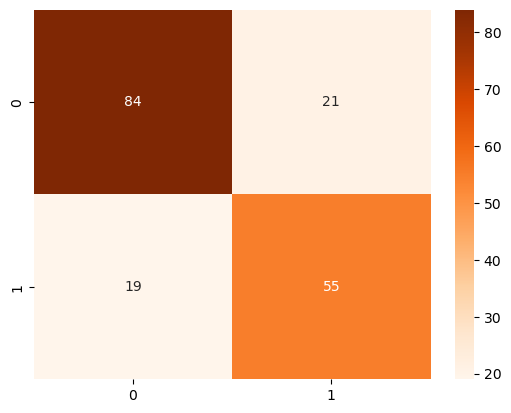

In [25]:
sns.heatmap(con,annot=True,cmap="Oranges")

DECISION TREE BY USING GINI AS CRITERION 

84 people who actually died were correctly predicted as not surviving.

21 people who actually died were wrongly predicted as surviving.

19 people who actually survived were wrongly predicted as not surviving.

55 people who actually survived were correctly predicted as surviving.

In [26]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
df.fit(x_train,y_train)
pred=df.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
accuracy=classification_report(y_test,pred)
print(accuracy)
con=confusion_matrix(y_test,pred)
con

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



array([[91, 14],
       [21, 53]], dtype=int64)

<Axes: >

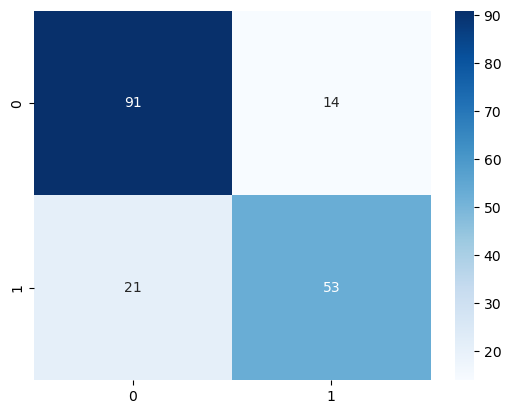

In [27]:
sns.heatmap(con,annot=True,cmap="Blues")

DECISION TREE BY USING ENTROPY AS CRITERION 

91 people who actually died were correctly predicted as not surviving.

14 people who actually died were wrongly predicted as surviving.

21 people who actually survived were wrongly predicted as not surviving.

53 people who actually survived were correctly predicted as surviving.

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
accuracy=classification_report(y_pred,y_test)
print(accuracy)
con=confusion_matrix(y_pred,y_test)
con

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       115
           1       0.65      0.75      0.70        64

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.78      0.77      0.77       179



c:\Users\kadam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[89, 26],
       [16, 48]], dtype=int64)

<Axes: >

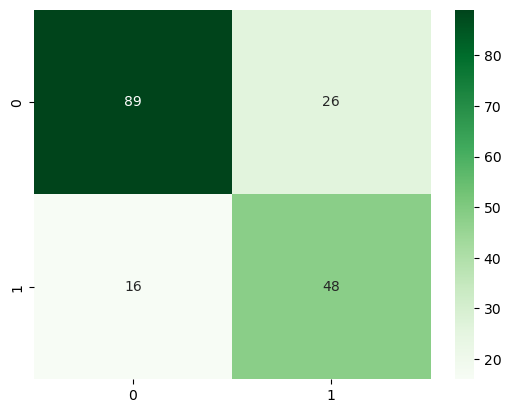

In [30]:
sns.heatmap(con,cmap="Greens",annot=True)